## Análisis de Regresión Logística en Campañas de Marketing

**CAIRO Lucia** **13030**

En este notebook, se realiza un análisis de regresión logística utilizando un dataset de campañas de marketing. La regresión logística es una técnica estadística utilizada para modelar la probabilidad de un resultado binario, en este caso, si un cliente compró o no un producto.

#### Descripción del Dataset

El dataset que utilizado proviene de Kaggle y contiene información sobre diversas campañas de marketing, incluyendo las siguientes características:

- **Customer id**: Identificador único del cliente.
- **Age**: Edad del cliente.
- **Gender**: Género del cliente.
- **Email Opened**: Indicador de si el cliente abrió el correo electrónico de la campaña.
- **Email Clicked**: Indicador de si el cliente hizo clic en algún enlace del correo electrónico de la campaña.
- **Product Page Visit**: Indicador de si el cliente visitó la página del producto.
- **Discount Offered**: Indicador de si se ofreció un descuento al cliente.
- **Location**: Indicador de la locacion del cliente.
- **Purchased**: Variable objetivo que indica si el cliente compró (1) o no compró (0) el producto.

Dataset disponible en: https://www.kaggle.com/datasets/taseermehboob9/marketing-campaigns-logistic-regression/data 

#### Objetivo del Análisis

El objetivo es construir un modelo de regresión logística que pueda predecir si un cliente comprará un producto basado en las características disponibles. Para ello, se siguen los pasos a continuación:

1. **Importar las bibliotecas necesarias**
2. **Cargar el dataset**
3. **Explorar y limpiar los datos**
4. **Preparar los datos para la regresión logística**
5. **Dividir los datos en conjuntos de entrenamiento y prueba**
6. **Entrenar el modelo de regresión logística**
7. **Evaluar el modelo**
8. **Interpretar los resultados**

Este análisis permitirá entender mejor los factores que influyen en la decisión de compra de los clientes y mejorar nuestras estrategias de marketing.

### 1. Importar las bibliotecas necesarias

In [87]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf


### 2. Cargar el dataset



In [88]:
df = pd.read_csv('./Marketingcampaigns.csv') 
df.head(3)

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1


### 3. Explorar y limpiar los datos


In [89]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer id         20 non-null     int64 
 1   Age                 20 non-null     int64 
 2   Gender              20 non-null     int64 
 3   Location            20 non-null     object
 4   Email Opened        20 non-null     int64 
 5   Email Clicked       20 non-null     int64 
 6   Product page visit  20 non-null     int64 
 7   Discount offered    20 non-null     int64 
 8   Purchased           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,38.250000,0.550000,0.500000,0.600000,2.10000,0.500000,0.500000
std,5.91608,15.382406,0.510418,0.512989,0.502625,1.68273,0.512989,0.512989
min,1.00000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.75000,24.500000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,10.50000,38.000000,1.000000,0.500000,1.000000,2.00000,0.500000,0.500000
75%,15.25000,53.500000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000
max,20.00000,62.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000


**Resumen** 

El dataset consta de 20 entradas y 9 columnas.
| **Columna**            | **Tipo de Dato** | **Rango**  |  
|------------------------|------------------|------------|
| Customer id            | int64            | 1 - 20     | 
| Age                    | int64            | 15 - 61    | 
| Gender                 | int64            | 0 - 1      | 
| Location               | object           | -          | 
| Email Opened           | int64            | 0 - 1      | 
| Email Clicked          | int64            | 0 - 1      | 
| Product page visit     | int64            | 0 - 1      |
| Discount offered       | int64            | 0 - 1      | 
| Purchased              | int64            | 0 - 1      | 

No hay valores nulos en ninguna de las columnas del dataset.

### 4. Preparar los datos para la regresión logística


In [90]:
# Convertir las variables categóricas 
df = pd.get_dummies(df, drop_first=True)

# Separar las características (X) de la variable a predecir (Y)
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# El método factorize() es para convertir valores categóricos en códigos numéricos
#df['Location_Brisbane0'] = df['Location_Brisbane'].factorize()[0]
#df['Location_Perth0'] = df['Location_Perth'].factorize()[0]
#df['Location_Sydney0'] = df['Location_Sydney'].factorize()[0]
df = df.drop(columns=['Customer id'])

df.head()


,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased,Location_Brisbane,Location_Perth,Location_Sydney
0,22,0,1,1,3,1,1,False,True,False
1,55,0,1,0,0,0,0,False,False,False
2,15,1,0,1,2,1,1,False,False,True
3,25,0,1,1,5,1,0,True,False,False
4,36,1,0,1,1,1,0,True,False,False


**Visualizaciones previas**

*Edad vs Descuentos*

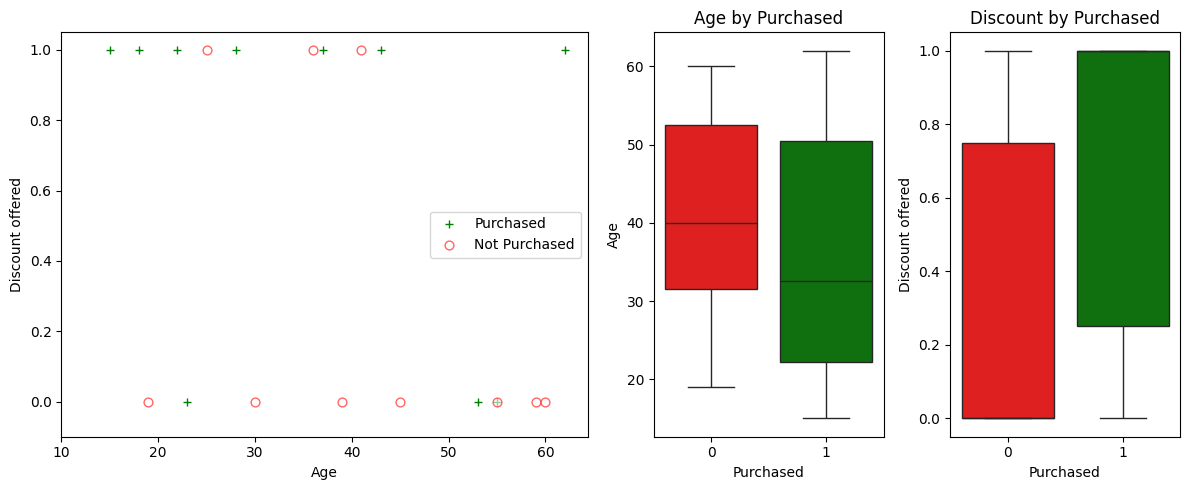

In [91]:
fig = plt.figure(figsize=(12,5)) 
gs = mpl.gridspec.GridSpec(1, 4)

# ax1 ocupa las primeras dos columnas del espacio disponible en la fila.
ax1 = plt.subplot(gs[0,:-2])

# ax2 ocupa la tercera columna del espacio disponible en la fila.
ax2 = plt.subplot(gs[0,-2])

# ax3 ocupa la última columna del espacio disponible en la fila.
ax3 = plt.subplot(gs[0,-1])

# Toma una fracción de las muestras donde el valor objetivo (purchased) es 'no'
df_no = df[df['Purchased'] == 0]
# Toma todas las muestras donde el valor objetivo sea 'sí'
df_yes = df[df['Purchased'] == 1]
# Combina para equilibrar 
df_ = pd.concat([df_no, df_yes])

# Edad vs Descuento
ax1.scatter(df_[df_['Purchased'] == 1]['Age'], df_[df_['Purchased'] == 1]['Discount offered'],
            s=40, c='green', marker='+', linewidths=1, label='Purchased')
ax1.scatter(df_[df_['Purchased'] == 0]['Age'], df_[df_['Purchased'] == 0]['Discount offered'],
            s=40, marker='o', linewidths=1, edgecolors='red', facecolors='white', alpha=.6, label='Not Purchased')

ax1.set_ylim(ymin=-0.1)
ax1.set_ylabel('Discount offered')
ax1.set_xlim(xmin=10)
ax1.set_xlabel('Age')
ax1.legend()

# Edad por si Compraron o No
c_palette = {0: 'red', 1: 'green'}
sns.boxplot(x='Purchased', y='Age', data=df, ax=ax2, hue='Purchased', palette=c_palette, legend=False)
ax2.set_title('Age by Purchased')

# Descuentos por si Compraron o No
sns.boxplot(x='Purchased', y='Discount offered', data=df, ax=ax3, hue='Purchased', palette=c_palette, legend=False)
ax3.set_title('Discount by Purchased')

gs.tight_layout(plt.gcf())
plt.show()

*Visitas a la pagina vs Edad*

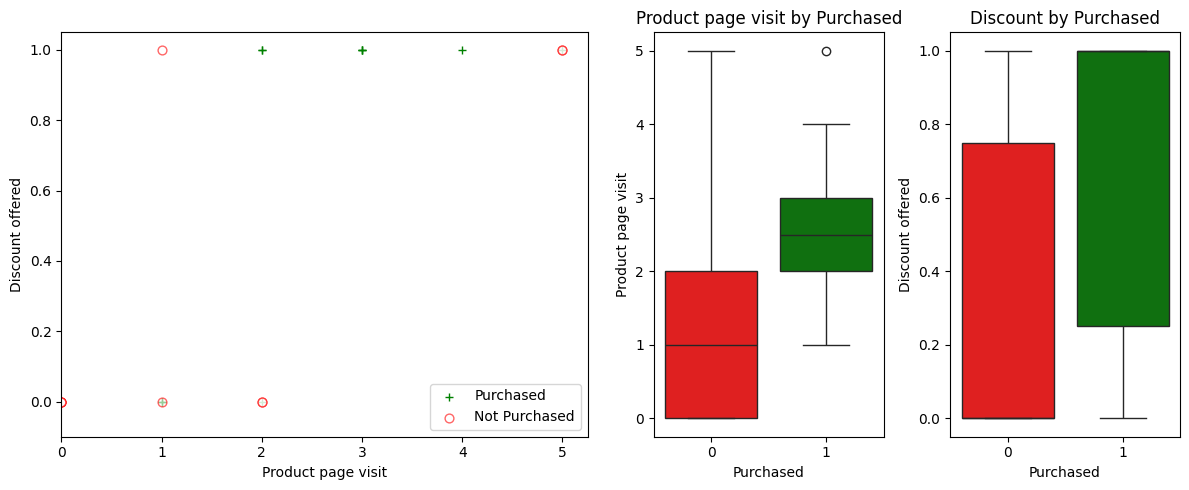

In [92]:
fig = plt.figure(figsize=(12,5)) 
gs = mpl.gridspec.GridSpec(1, 4)

# ax1 ocupa las primeras dos columnas del espacio disponible en la fila.
ax1 = plt.subplot(gs[0,:-2])

# ax2 ocupa la tercera columna del espacio disponible en la fila.
ax2 = plt.subplot(gs[0,-2])

# ax3 ocupa la última columna del espacio disponible en la fila.
ax3 = plt.subplot(gs[0,-1])

# Toma una fracción de las muestras donde el valor objetivo (purchased) es 'no'
df_no = df[df['Purchased'] == 0]
# Toma todas las muestras donde el valor objetivo sea 'sí'
df_yes = df[df['Purchased'] == 1]
# Combina para equilibrar 
df_ = pd.concat([df_no, df_yes])

# Edad vs Descuento
ax1.scatter(df_[df_['Purchased'] == 1]['Product page visit'], df_[df_['Purchased'] == 1]['Discount offered'],
            s=40, c='green', marker='+', linewidths=1, label='Purchased')
ax1.scatter(df_[df_['Purchased'] == 0]['Product page visit'], df_[df_['Purchased'] == 0]['Discount offered'],
            s=40, marker='o', linewidths=1, edgecolors='red', facecolors='white', alpha=.6, label='Not Purchased')

ax1.set_ylim(ymin=-0.1)
ax1.set_ylabel('Discount offered')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('Product page visit')
ax1.legend()

# Edad por si Compraron o No
c_palette = {0: 'red', 1: 'green'}
sns.boxplot(x='Purchased', y='Product page visit', data=df, ax=ax2, hue='Purchased', palette=c_palette, legend=False)
ax2.set_title('Product page visit by Purchased')

# Descuentos por si Compraron o No
sns.boxplot(x='Purchased', y='Discount offered', data=df, ax=ax3, hue='Purchased', palette=c_palette, legend=False)
ax3.set_title('Discount by Purchased')

gs.tight_layout(plt.gcf())
plt.show()

*Click en Email vs Descuentos*

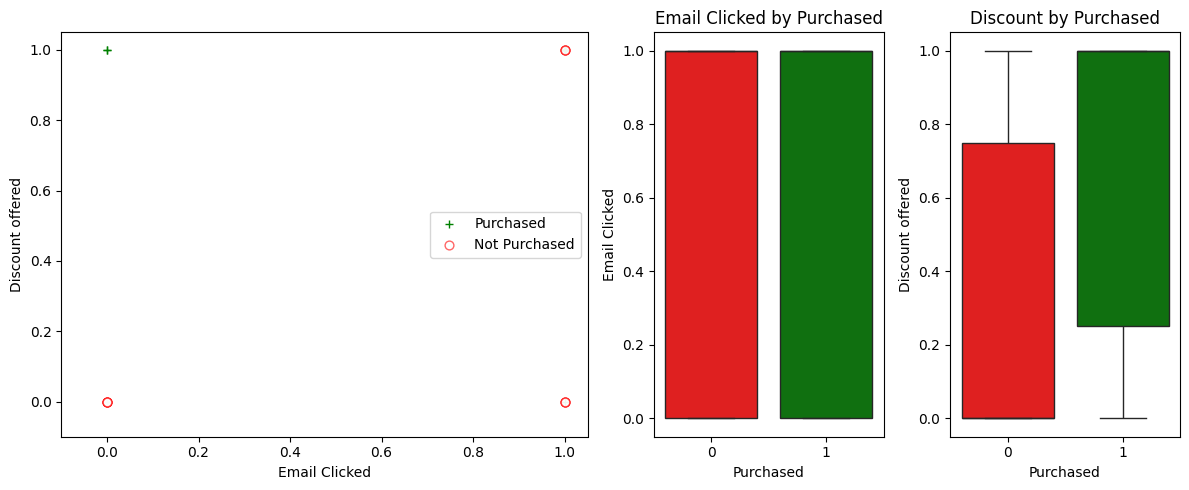

In [93]:
fig = plt.figure(figsize=(12,5)) 
gs = mpl.gridspec.GridSpec(1, 4)

# ax1 ocupa las primeras dos columnas del espacio disponible en la fila.
ax1 = plt.subplot(gs[0,:-2])

# ax2 ocupa la tercera columna del espacio disponible en la fila.
ax2 = plt.subplot(gs[0,-2])

# ax3 ocupa la última columna del espacio disponible en la fila.
ax3 = plt.subplot(gs[0,-1])

# Toma una fracción de las muestras donde el valor objetivo (purchased) es 'no'
df_no = df[df['Purchased'] == 0]
# Toma todas las muestras donde el valor objetivo sea 'sí'
df_yes = df[df['Purchased'] == 1]
# Combina para equilibrar 
df_ = pd.concat([df_no, df_yes])

# Edad vs Descuento
ax1.scatter(df_[df_['Purchased'] == 1]['Email Clicked'], df_[df_['Purchased'] == 1]['Discount offered'],
            s=40, c='green', marker='+', linewidths=1, label='Purchased')
ax1.scatter(df_[df_['Purchased'] == 0]['Email Clicked'], df_[df_['Purchased'] == 0]['Discount offered'],
            s=40, marker='o', linewidths=1, edgecolors='red', facecolors='white', alpha=.6, label='Not Purchased')

ax1.set_ylim(ymin=-0.1)
ax1.set_ylabel('Discount offered')
ax1.set_xlim(xmin=-0.1)
ax1.set_xlabel('Email Clicked')
ax1.legend()

# Edad por si Compraron o No
c_palette = {0: 'red', 1: 'green'}
sns.boxplot(x='Purchased', y='Email Clicked', data=df, ax=ax2, hue='Purchased', palette=c_palette, legend=False)
ax2.set_title('Email Clicked by Purchased')

# Descuentos por si Compraron o No
sns.boxplot(x='Purchased', y='Discount offered', data=df, ax=ax3, hue='Purchased', palette=c_palette, legend=False)
ax3.set_title('Discount by Purchased')

gs.tight_layout(plt.gcf())
plt.show()

**Matriz Correlacion**

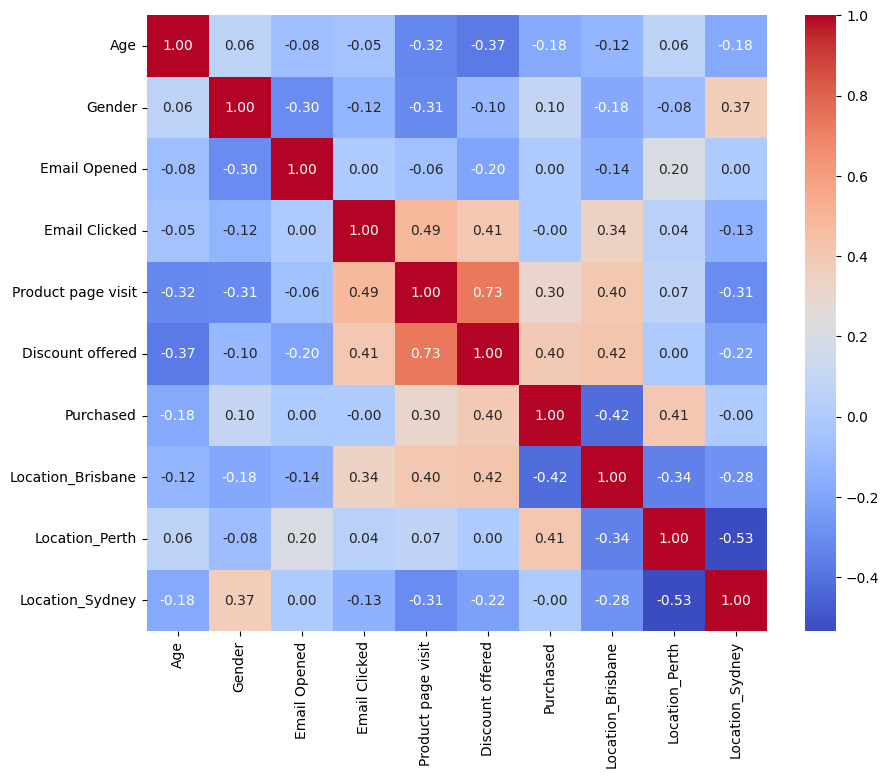

In [94]:
correlation_matrix = df.corr()
# Visualizar 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)
plt.show()

In [95]:
# Selecciono las correlaciones con 'Purchased'
correlation_with_target = correlation_matrix['Purchased'].sort_values(ascending=False)

# Filtrar las que tienen correlación mayor
significant_features = correlation_with_target[correlation_with_target > 0.3]
print(significant_features)

Purchased             1.000000
Location_Perth        0.408248
Discount offered      0.400000
Product page visit    0.304855
Name: Purchased, dtype: float64


### 5. Dividir los datos 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 6. Regresión logística

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

**Discounts**

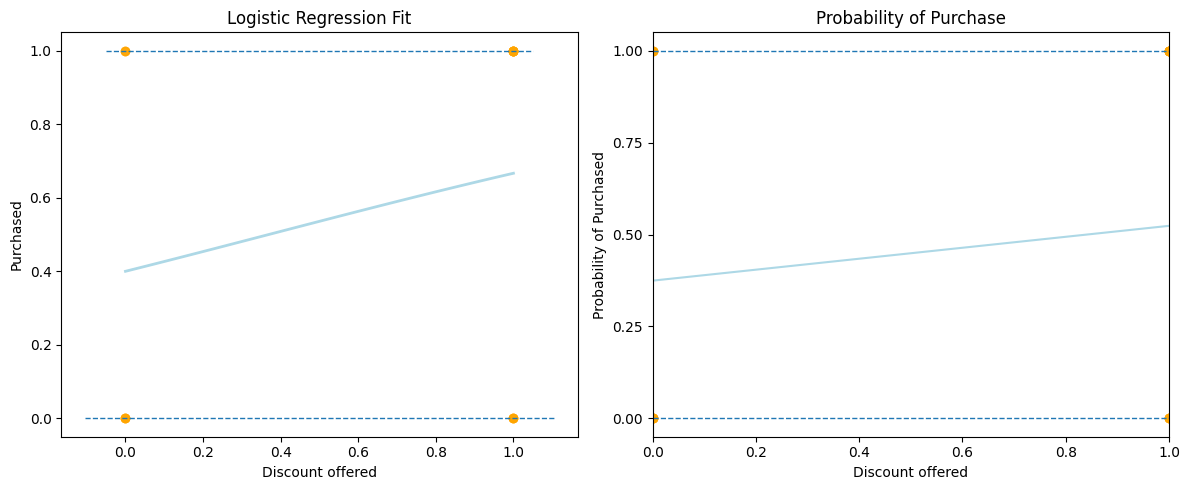

In [98]:
# Predecir las probabilidades en el conjunto de prueba
prob = logreg.predict_proba(X_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regresión logística ajustada sobre Discount offered
sns.regplot(x=X_train['Discount offered'], y=y_train, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'orange'},
            line_kws={'color': 'lightblue', 'lw': 2}, ax=ax1)
ax1.set_title('Logistic Regression Fit')
ax1.set_xlabel('Discount offered')
ax1.set_ylabel('Purchased')

# Probabilidad de compra
ax2.scatter(X_train['Discount offered'], y_train, color='orange')
ax2.plot(X_test['Discount offered'], prob[:, 1], color='lightblue')
ax2.set_title('Probability of Purchase')
ax2.set_ylabel('Probability of Purchased')
ax2.set_xlabel('Discount offered')
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax2.set_xlim(xmin=X_train['Discount offered'].min(), xmax=X_train['Discount offered'].max())

# Líneas horizontales
for ax in fig.axes:
    ax.hlines(1, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)

plt.tight_layout()
plt.show()

*Interpretación*

- puntos naranjas representan los datos de entrenamiento.
- línea azul punteada muestra el ajuste de la regresión logística
- línea azul representa la probabilidad de compra en función a si se ofrecio un descuento. 

Logistic Regression Fit: Existe una relación positiva entre ofrecer un descuento y la probabilidad de que el cliente compre. La pendiente no es extremadamente pronunciada, sugiere que ofrecerlo tiene un efecto moderado en la compra.

Probability of Purchase: Aumento en la probabilidad de compra cuando se ofrece un descuento, aunque el incremento no es muy grande. Esto refuerza la idea de que el descuento ofrecido influye en la decisión de compra, pero la influencia es limitada.

**Product page visit**

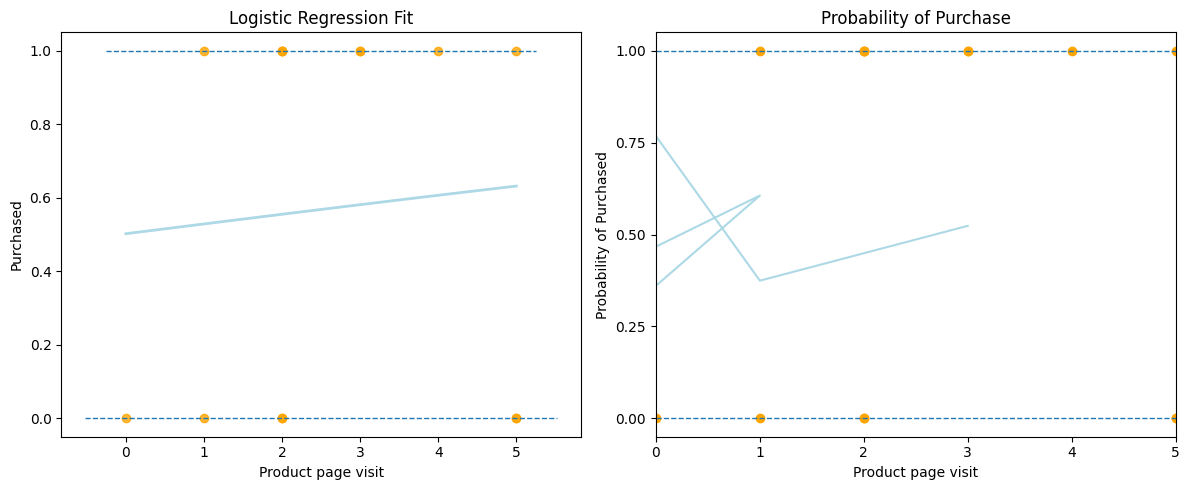

In [99]:
# Predecir las probabilidades en el conjunto de prueba
prob = logreg.predict_proba(X_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regresión logística ajustada sobre Product page visit
sns.regplot(x=X_train['Product page visit'], y=y_train, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'orange'},
            line_kws={'color': 'lightblue', 'lw': 2}, ax=ax1)
ax1.set_title('Logistic Regression Fit')
ax1.set_xlabel('Product page visit')
ax1.set_ylabel('Purchased')

# Probabilidad de compra
ax2.scatter(X_train['Product page visit'], y_train, color='orange')
ax2.plot(X_test['Product page visit'], prob[:, 1], color='lightblue')
ax2.set_title('Probability of Purchase')
ax2.set_ylabel('Probability of Purchased')
ax2.set_xlabel('Product page visit')
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax2.set_xlim(xmin=X_train['Product page visit'].min(), xmax=X_train['Product page visit'].max())

# Líneas horizontales
for ax in fig.axes:
    ax.hlines(1, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)

plt.tight_layout()
plt.show()

*Interpretación*

- puntos naranjas representan los datos de entrenamiento.
- línea azul punteada muestra el ajuste de la regresión logística
- línea azul representa la probabilidad de compra en función del número de visitas a la página del producto. 

Logistic Regression Fit: La pendiente es muy suave, lo que indica que `Product page visit` no tiene una gran influencia en la decisión de compra.

Probability of Purchase: La probabilidad de compra no está muy alineada con el número de visitas, lo que refuerza la idea de que esta variable podría no ser un buen predictor por sí sola.

### 7. Evaluar el modelo

In [100]:
y_pred = logreg.predict(X_test)

In [101]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2 2]
 [1 1]]


**True Positives (TP)**: 2 clientes compraron y fueron clasificados correctamente como compradores

**False Positives (FP)**: 2 clientes no compraron pero fueron clasificados incorrectamente como compradores

**False Negatives (FN)**: 1 cliente compro pero fue clasificados incorrectamente como no comprador

**True Negatives (TN)**: 1 cliente no compro y fue clasificados correctamente como no comprador

In [83]:
# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



**Clase que NO compró:**
   - **Precision (Precisión)**: El 67% de los clientes clasificados como "no compradores" realmente no compraron.
   - **Recall (Sensibilidad)**: El 50% de los clientes que realmente no compraron fueron correctamente identificados.
   - **Support**: 4  verdaderos casos de la clase que no compro en el conjunto de datos.

**Clase que SI compró:**
   - **Precision (Precisión)**: El 33% de los clientes clasificados como "compradores" realmente compraron.
   - **Recall (Sensibilidad)**: El 50% de los clientes que realmente compraron fueron correctamente identificados.
   - **Support**: 2 verdaderos casos de la clase 1 en el conjunto de datos.

**Accuracy (Precisión Global)**: El modelo clasifica correctamente el 50% de los casos totales.

*La mitad de las predicciones fueron correctas. El modelo tiene un mejor desempeño en la identificación de clientes que no compraron.*


### 8. Interpretar los resultados

In [102]:
# coeficientes del modelo
coef_df = pd.DataFrame(logreg.coef_[0], index=X.columns, columns=['Coeficiente'])
print(coef_df)

                    Coeficiente
Customer id            0.011741
Age                    0.040327
Gender                 0.265863
Email Opened           0.174754
Email Clicked         -0.402404
Product page visit     0.254558
Discount offered       0.740615
Location_Brisbane     -1.032094
Location_Perth         0.467471
Location_Sydney        0.695245



- **Age**: + edad -> aumento en la probabilidad de compra. 

- **Gender**: femenino -> aumento en la probabilidad de compra

- **Email Opened**: abrir el correo electrónico -> aumento en la probabilidad de compra

- **Email Clicked**: Hacer clic en el correo electrónico -> disminución en la probabilidad de compra. 

- **Product page visit**: + visitas a la página del producto -> aumento en la probabilidad de compra

- **Discount offered**: ofrecer un descuento -> fuerte aumento en la probabilidad de compra 

- **Location_Brisbane**: estar en Brisbane -> disminución en la probabilidad de compra.

- **Location_Perth**: estar en Perth -> aumento en la probabilidad de compra

- **Location_Sydney**: estar en Sydney -> aumento en la probabilidad de compra

#### Clientes que Más Compran:
   - Los clientes en Perth y Sydney 
   - Ofrecer descuentos 

#### Clientes que Menos Compran:
   - Los clientes en Brisbane 
   - Hacen clic en el correo electrónico 

#### Consideraciones: 
Con 20 entradas, el tamaño del dataset es relativamente **pequeño** para entrenar un modelo de regresión logística robusto. Esto puede limito la capacidad del modelo para generalizar a nuevos datos y lleva a una sobreajuste (overfitting) o resultados poco fiables.
   
La precisión global del 50% indica que el modelo no está desempeñándose tan bien en la clasificación general. 

## COMPRA O NO?

In [114]:
# Datos del nuevo cliente
new_data = {
    'Customer id': [1], 
    'Age': [15],
    'Gender': [0],  # 1 femenino 
    'Email Opened': [0],
    'Email Clicked': [1],
    'Product page visit': [0],
    'Discount offered': [0],
    'Location_Brisbane': [1],
    'Location_Perth': [0],
    'Location_Sydney': [0]
}

new_df = pd.DataFrame(new_data)
probabilities = logreg.predict_proba(new_df)
probability_of_purchase = probabilities[0][1]

print(f'Probabilidad de compra: {probability_of_purchase:.2f}')


Probabilidad de compra: 0.03
